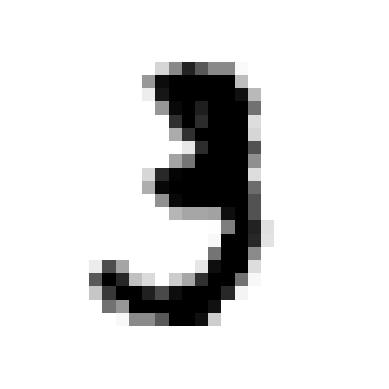

In [61]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./data/mnist.csv")
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
y = y.astype(np.int8)

some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [62]:
y[1]

3

In [63]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [64]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

``` Stochastic Gradient Descent: Capable of handling lots of data, deals with instances independently, but only local mins```

In [65]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95274496, 0.93745657, 0.94923505])

In [67]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[3752,  160],
       [  71,  333]], dtype=int64)

```Evaluating using confusion matrix an accuracy
TP = True Positives (3752)
FP = False Positives (160)
FN = False Negatives (71)
TN = True Negatives (333)

Precision: TP / (TP+FP) | Accuracy of positive predictions 
Wikipedia says: (High Precision) Returns more relevant results than irrelevant ones

Recall (Sensitivity or true positive rate "TPR"): TP/ (TP+FN) | Ratio of positive instances that are correctly detected by the classifier. "Did you accept anything you want or were you selective?"
Wikipedia says: (High Recall) Returns most of the relevant results (whether or not irrelevant ones are also returned)

    High Recall, Low Precision: Checking everyone's receipt to prevent shoplifting. Most are innocent, but you catch anyone shoplifting.

    High Precision, Low Recall: 
        - Children video filtering, we sacrafice many videos that aren't completely positive for children, but the ones that get through are definitely for children.
    
    ChatGPT Example: Example: Cancer Treatment Decision System

Imagine a system designed to assist oncologists in deciding whether to administer a particular chemotherapy treatment to cancer patients. This treatment has significant side effects and should only be given to patients who are very likely to benefit from it.

High Precision: In this scenario, high precision means that when the system recommends administering the treatment to a patient, it's highly confident that the patient will benefit from it, and the patient indeed benefits. The system rarely recommends the treatment incorrectly to patients who won't benefit from it, reducing the risk of unnecessary harm.

Low Recall: Low recall in this context means that the system may miss some patients who would actually benefit from the treatment. However, since the treatment has significant side effects, it's preferable to err on the side of caution and avoid administering it to patients who might not benefit, even if it means missing some patients who would benefit.
```